<a href="https://colab.research.google.com/github/Lohith2211/SentimentAnalysis/blob/main/DL_Project(_TweetGuard_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


First, I'll generate the `requirements.txt` file containing all the necessary libraries for your application.

In [5]:
import re
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# prompt: install all lib used in this notebook

!pip install kagglehub
!pip install wordcloud
!pip install nltk
!pip install scikit-learn


In [ ]:
!pip install requests pandas
import requests
import pandas as pd
import os
import zipfile

url = "https://www.kaggle.com/api/v1/datasets/download/kazanova/sentiment140?dataset_version_number=2"

response = requests.get(url)
response.raise_for_status()

zip_file_path = "sentiment140.zip"
with open(zip_file_path, "wb") as f:
    f.write(response.content)

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(".")

csv_file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(
    csv_file_path,
    encoding="latin-1",
    header=None,
    names=["target", "id", "date", "flag", "user", "text"],
)

print("First 5 records:", df.head())

First 5 records:    target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=df.copy()

In [ ]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
unique_counts = df['target'].value_counts()
print(unique_counts)

target
0    800000
4    800000
Name: count, dtype: int64


In [ ]:
df['target'].unique()

array([0, 4])

In [ ]:
df['text'][190]

"I activated my Selfcontrol block early, meaning I can't check out the new QC.  Regularizing my internal clock is might be difficult. #fb"

In [ ]:

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    PorterStemmer()
except LookupError:
    nltk.download('punkt')


def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'@\w+|\#', '', text)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)


try:
    df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'text'])
    df['processed_text'] = df['text'].apply(preprocess_text)

    print(df.head())
    print(df['processed_text'][190])

except FileNotFoundError:
    print("Error: File not found. Please upload the 'training.1600000.processed.noemoticon.csv' file to your Colab environment.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
target_group = df.groupby('target').count()['text']
target_group

,text
target,
0,800000
4,800000


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

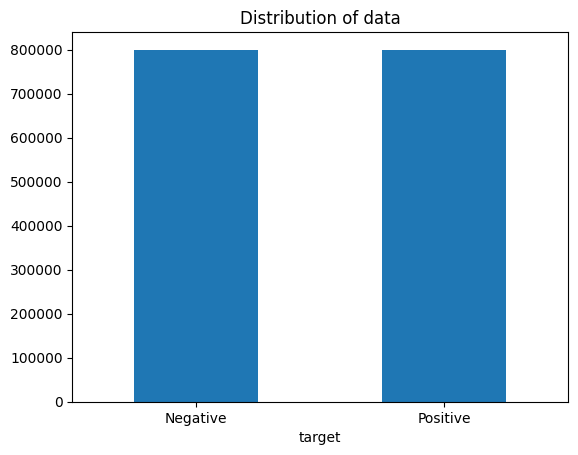

In [ ]:
ax = target_group.plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation = 0)

In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
data = df[['target', 'text']]
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.columns = ["sentiment", "text"]
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data[data['sentiment'] != 0].head()

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [ ]:
data['sentiment'] = data['sentiment'].replace(4,1)

<ipython-input-23-85226499ea73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].replace(4,1)


In [ ]:
data[data['sentiment'] != 0].head()

,sentiment,text
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


In [ ]:
data.isnull().sum()

,0
sentiment,0
text,0


In [ ]:
text, sentiment = list(data['text']), list(data['sentiment'])

In [ ]:
text[0:16]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [ ]:
sentiment[0:16]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
mystopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
english_stop_words =  stopwords.words('english')
english_stop_words[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [ ]:
stopwordlist = stopwords.words('english') + mystopwordlist

In [ ]:
def preprocess(textdata):
    processedText = []

    wordLemma = WordNetLemmatizer()


    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+' # e.g @FagbamigbeK check this out
    alphaPattern      = "[^a-zA-Z0-9]" # e.g I am *10 better!
    sequencePattern   = r"(.)\1\1+"  # e.g Heyyyyyyy, I am back!
    seqReplacePattern = r"\1\1" # e.g Replace Heyyyyyyy with Heyy


    for tweet in textdata:
        tweet = tweet.lower() #normalizing all text to a lower case

        tweet = re.sub(urlPattern,' URL',tweet) #using the substitution method of the regular expression library

        for emoji in emojis.keys(): #in each of the looped tweet, replace each emojis with their respective meaning
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])  # emojis[emoji] helps to get the value of the emoji from the dictionary

        tweet = re.sub(userPattern,' USER', tweet)  #To hide Personal Information, we can replace all usernames with User


        tweet = re.sub(alphaPattern, " ", tweet) # e.g I am *10 better!

        tweet = re.sub(sequencePattern, seqReplacePattern, tweet) # e.g Replace Heyyyyyyy with Heyy


        tweetwords = ''
        for word in tweet.split():
            if len(word) > 2 and word.isalpha():
                word = wordLemma.lemmatize(word)
                tweetwords += (word + ' ')

        processedText.append(tweetwords)

    return processedText

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import time
t = time.time()
preprocessedtext = preprocess(text)
print(f'Text Processing Done.')
print(f'Time taken for text processing: {round(time.time()-t)} seconds')

Text Processing Done.
Time taken for text processing: 121 seconds


In [ ]:
text[0:11]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing "]

In [ ]:
preprocessedtext[0:11]

['USER URL aww that bummer you shoulda got david carr third day EMOJIwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 'USER dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 'USER not behaving all mad why here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have ',
 'USER que muera ',
 'spring break plain city snowing ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [ ]:
X_train

['working double texas roadhouse ',
 'envy everyone thats not working today such nice day ',
 'USER hehe thanks that had everyone class laughing too ',
 'woot woot haha gonna the movie again uncle iphone ',
 'pissed that ha use this crappy phone til get new one ',
 'okay have aim account now send there can add thx ',
 'USER fly wanna see quot quot and need someone with ',
 'USER your gaant chart because contributes the mark all wont take long promise ',
 'watching buffy the vampire slayer ',
 'USER you got take these opportunity every time wear mine either rain stupidly windy ',
 'USER dishab ham sheykh parkvey bood ',
 'USER thanks man feel great encouraged everyone need even thanks sharing the love god awesome dion levy ',
 'just got out brandi carlile fav the four time seen her speechless ',
 'USER osdcmy osdc ',
 'raining like crazy plainview while delivering mail ',
 'USER twitterworld place hangout isn awesome ppl here like ',
 'thanks cavs thanks ',
 'USER happy birthday ',
 'US

In [ ]:
preprocessedtext

['USER URL aww that bummer you shoulda got david carr third day EMOJIwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 'USER dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 'USER not behaving all mad why here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have ',
 'USER que muera ',
 'spring break plain city snowing ',
 'just pierced ear ',
 'USER couldn bear watch and thought the loss wa embarrassing ',
 'USER count idk why did either you never talk anymore ',
 'USER would been the first but didn have gun not really though zac snyder just doucheclown ',
 'USER wish got watch with you miss you and USER how wa the premiere ',
 'hollis death scene will hurt severely watch film wry director cut not out now ',
 'about file tax ',
 'USER ahh ive always 

In [ ]:
import pandas as pd
clean_data=pd.DataFrame(preprocessedtext)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=100)
vectorizer.fit(X_train)

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f'Vectorization Done.')


Vectorization Done.


In [ ]:
X_test_vec.shape[1]

100

In [ ]:
# LSTM model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = X_train_vec.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_vec, np.array(y_train), epochs=5, batch_size=32, validation_split=0.1)

_, accuracy = model.evaluate(X_test_vec, np.array(y_test))
print('Accuracy: {}'.format(accuracy))

predictions = model.predict(X_test_vec)


In [ ]:
# prompt: train the model using CuDNNLSTM

import numpy as np
# LSTM model with CuDNNLSTM


vocab_size = X_train_vec.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(CuDNNLSTM(32))  # Use CuDNNLSTM instead of LSTM
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_vec, np.array(y_train), epochs=5, batch_size=32, validation_split=0.1)

_, accuracy = model.evaluate(X_test_vec, np.array(y_test))
print('Accuracy: {}'.format(accuracy))

predictions = model.predict(X_test_vec)


ImportError: cannot import name 'CuDNNLSTM' from 'tensorflow.keras.layers' (/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/layers/__init__.py)

In [ ]:
# simple rnn model with lstm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
X_train_dense = X_train_vec.toarray()
X_test_dense = X_test_vec.toarray()

X_train_reshaped = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_test_reshaped = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_reshaped, np.array(y_train), epochs=3, batch_size=64, validation_split=0.1)

_, accuracy = model.evaluate(X_test_reshaped, np.array(y_test))
print('Accuracy: {}'.format(accuracy))

predictions = model.predict(X_test_reshaped)


In [ ]:
model.predict(X_test_reshaped[:3])

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


normalized_predictions = np.round(predictions)

num_0 = np.sum(normalized_predictions == 0)
num_1 = np.sum(normalized_predictions == 1)

plt.figure(figsize=(8, 6))
plt.bar(['Negative', 'Positive'], [num_0, num_1], color=['red', 'green'])
plt.xlabel("Predicted Class")
plt.ylabel("Number of Predictions")
plt.title("Distribution of Predicted Classes")
plt.show()


In [ ]:

!pip install transformers

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)

text = "This is an example sentence."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(**encoded_input)
logits = output.logits
predicted_class = tf.argmax(logits, axis=1).numpy()[0]

print(f"Predicted class: {predicted_class}")


##Training the model with only  half of the data

In [ ]:

import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

X_train_vec = X_train_vec[:len(y_train)]  # Adjust X_train_vec to match y_train's length


k = 5000  # Choose the number of features you want to keep
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_vec, y_train)
X_test_selected = selector.transform(X_test_vec)


vocab_size = X_train_selected.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, 16))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_selected, np.array(y_train), epochs=5, batch_size=64, validation_split=0.4)

_, accuracy = model.evaluate(X_test_selected, np.array(y_test))
print('Accuracy: {}'.format(accuracy))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5000 is greater than n_features=100. All the features will be returned.
  warnings.warn(


Epoch 1/5
14250/14250 ━━━━━━━━━━━━━━━━━━━━ 3099s 217ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 2/5
14250/14250 ━━━━━━━━━━━━━━━━━━━━ 3007s 211ms/step - accuracy: 0.5027 - loss: 0.6929 - val_accuracy: 0.5083 - val_loss: 0.6919
Epoch 3/5
14250/14250 ━━━━━━━━━━━━━━━━━━━━ 3015s 211ms/step - accuracy: 0.5056 - loss: 0.6921 - val_accuracy: 0.5088 - val_loss: 0.6917
Epoch 4/5
 8567/14250 ━━━━━━━━━━━━━━━━━━━━ 16:08 170ms/step - accuracy: 0.5058 - loss: 0.6924

In [ ]:

model.save('sentiment_analysis_model.h5')

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


NameError: name 'model' is not defined

In [ ]:

import pickle
from tensorflow.keras.models import load_model

model = load_model('sentiment_analysis_model.h5')

with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

def predict_sentiment(text):
    processed_text = preprocess_text(text)

    text_vectorized = vectorizer.transform([processed_text])

    prediction = model.predict(text_vectorized)

    sentiment = 1 if prediction[0][0] > 0.5 else 0
    return sentiment

text_to_predict = "This is a great movie!"
predicted_sentiment = predict_sentiment(text_to_predict)
print(f"Predicted Sentiment: {predicted_sentiment}")

text_to_predict = "Worst movie ever"
predicted_sentiment = predict_sentiment(text_to_predict)
print(f"Predicted Sentiment: {predicted_sentiment}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessedtext, sentiment,
                                                    test_size = 0.5, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [ ]:

import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification


model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

encoded_texts = tokenizer(X_train, padding=True, truncation=True, return_tensors='tf')
sentiment = np.array(y_train)
bert_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bert_model.fit(dict(encoded_texts), sentiment, epochs=3, batch_size=64)

encoded_test_texts = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf")
output = bert_model(**encoded_test_texts)
logits = output.logits
predicted_class = tf.argmax(logits, axis=1).numpy()

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_class)
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/3
  129/12500 [..............................] - ETA: 2:24:36 - loss: 2.2401 - accuracy: 0.5008

KeyboardInterrupt: 

In [ ]:

from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(preprocessedtext, sentiment, test_size=0.2, random_state=42)

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

encoded_texts = tokenizer(X_train, padding=True, truncation=True, return_tensors='tf')
sentiment = np.array(y_train)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

distilbert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

distilbert_model.fit(dict(encoded_texts), sentiment, epochs=3, batch_size=16) # Reduced batch size

encoded_test_texts = tokenizer(X_test, padding=True, truncation=True, return_tensors="tf")

output = distilbert_model(**encoded_test_texts)
logits = output.logits
predicted_class = tf.argmax(logits, axis=1).numpy()

accuracy = accuracy_score(y_test, predicted_class)
print(f"Accuracy on the test set: {accuracy}")
